### Table of Contents
* [Project Description & Decomposition](#chapter)

* [Chapter 1: Exploratory Data Analysis](#chapter1)
    * [Section 1.1: Open the Data File & Analysis](#section_1_1)
    * [Section 1.2: identify the top 10 neighborhoods in terms of drop-offs](#section_1_2)
    * [Section 1.3: make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs](#section_1_3)
    * [Section 1.4: Conclusion](#section_1_4)

    
* [Chapter 2:  Test the hypotheses](#chapter2)

### Chapter : Project Description and Decomposition <a class="anchor" id="chapter"></a>
#### Step 1.

A new ride-sharing company that's launching in Chicago wants to find patterns in passenger preferences and the impact of external factors on rides.

The should be retrieve from database, analyze competitors and test a hypothesis about the impact of weather on ride frequency.


__Decomposition of Project__
1. import the files
2. study the data they contain
3. make sure the data types are correct
4. identify the top 10 neighborhoods in terms of drop-offs
5. make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
6. draw conclusions based on each graph and explain the results

#### Step 2. Testing hypotheses (Python)

__Testing the hypothesis:__

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Decide where to set the significance level (alpha) on your own.

__Explain:__

how the null and alternative hypotheses has formed?

what criterion used to test the hypotheses and why?

### Chapter 1: Project description <a class="anchor" id="chapter1"></a>

#### Section 1.1: Open the data File <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
from numpy import int64
import matplotlib.pyplot as plt

In [2]:
try:
    sql_project_1=pd.read_csv('/datasets/project_sql_result_01.csv')
except:
    sql_project_1=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Database_Project\project_sql_result_01.csv")
sql_project_1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [3]:
try:
    sql_project_2=pd.read_csv('/datasets/project_sql_result_04.csv')
except:
    sql_project_2=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Database_Project\project_sql_result_04.csv")
sql_project_2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [4]:
sql_project_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


The sql_project_1 dataset contains the following data columns:
1. company_name: taxi company name
2. trips_amount: the number of rides for each taxi company on November 15-16, 2017.

There are total 64 rows and the datatypes are correct.

In [5]:
sql_project_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The second dataset, sql_project_2 It contains the following data columns:
1. dropoff_location_name: Chicago neighborhoods where rides ended
2. average_trips: the average number of rides that ended in each neighborhood in November 2017. 

There are total 94 rows and the datatype for average_trips will be converted to the integer. THe total no. of rides should be a integer.

In [6]:
sql_project_2.average_trips =sql_project_2.average_trips.astype(int64)
print(sql_project_2.info())
sql_project_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


#### Section 1.2: identify the top 10 neighborhoods in terms of drop-offs <a class="anchor" id="section_1_2"></a>

In [7]:
sql_project_2.sort_values(by=['average_trips'], ascending=False)
top_10_neighborhood=sql_project_2.head(10)
print(top_10_neighborhood)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546
5             Lake View           2420
6            Grant Park           2068
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1259


Loop is the top ranked neighborhood in terms of the average_trips. It has highest no. of trips. The remaining top 10 has display in the table above. 

#### Section 1.3: Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs <a class="anchor" id="section_1_3"></a>

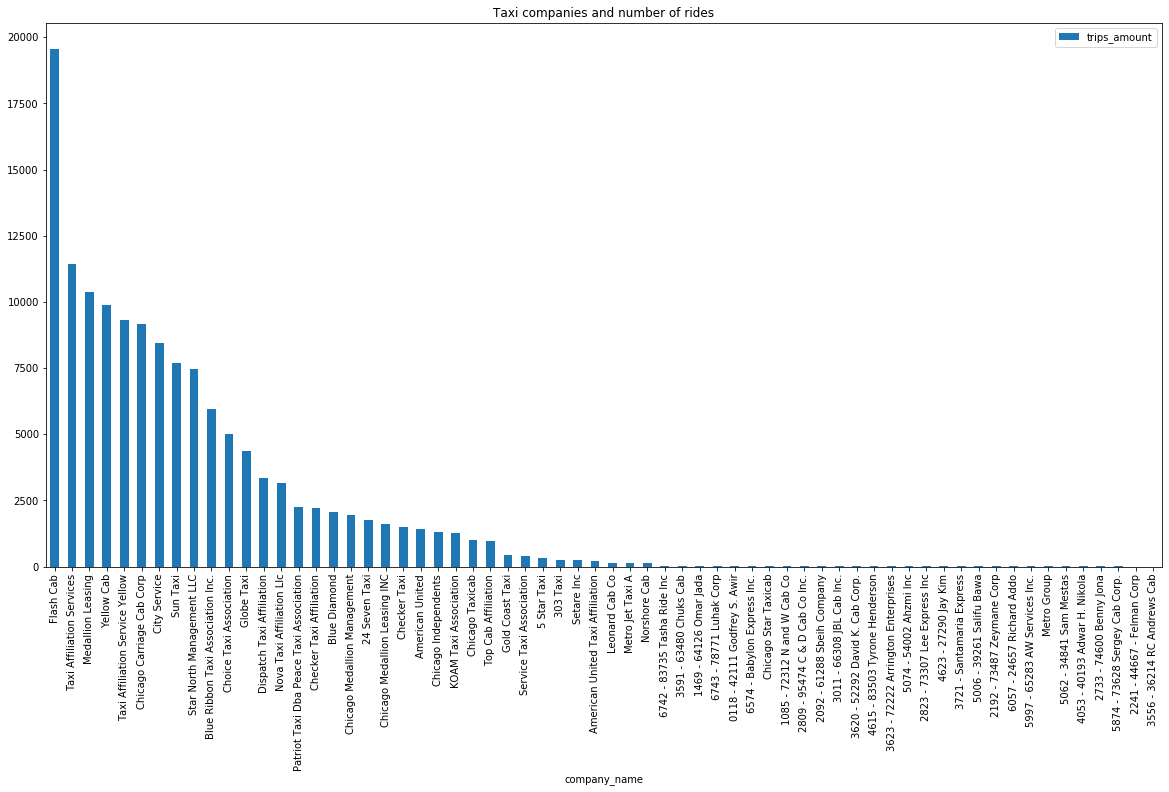

In [8]:
sql_project_1.plot.bar(x='company_name', y='trips_amount', figsize=(20,10), title='Taxi companies and number of rides');

There is huge difference between company to company in terms of no. of rides. For better data visualization the company names can be sorted i.e the first 20 highest rides companies can be ploted with it's name and remaining can be grouped in the 'other ' category for better representation.

In the below loop, the companies whose rides are less than 1500 has grouped named Other.

In [9]:
name=[]
for i,x in sql_project_1.iterrows():
    if x['trips_amount'] < 1500:
        name.append('Other')
    else:
        name.append(x['company_name'])
name
sql_project_1['company_name']=name

In [10]:
sql_project_1.head(25)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


THe companies represented by 'Other' has grouped by agg_func=sum. The data is sorted by descending order to find the highest ranked companies.

In [11]:
sql_project_1=sql_project_1.groupby(['company_name']).sum().reset_index()
sql_project_1.sort_values(by='trips_amount', ascending=False, inplace=True)

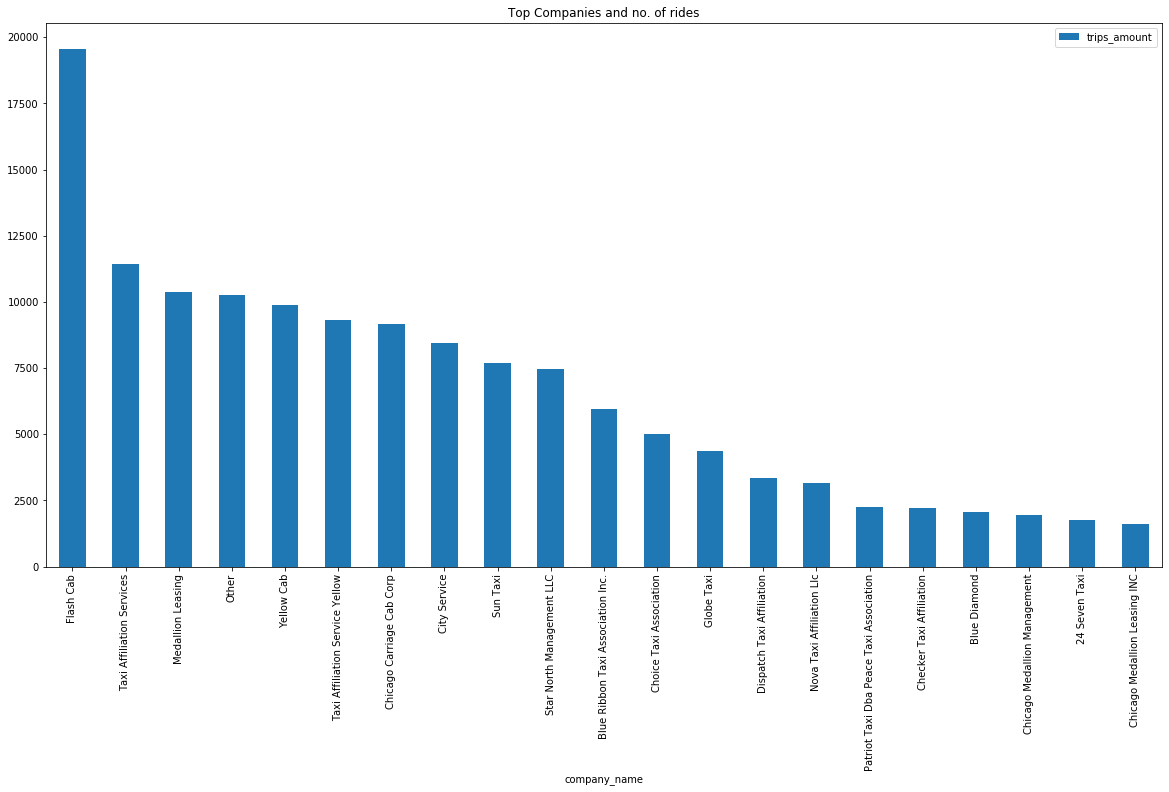

In [12]:
sql_project_1.plot.bar(x='company_name', y='trips_amount', figsize=(20,10), title='Top Companies and no. of rides');

### Top 10 neighborhoods by number of dropoffs

THe companies represented by 'Other' has grouped by agg_func=sum. The data is sorted by descending order to find the highest ranked companies.

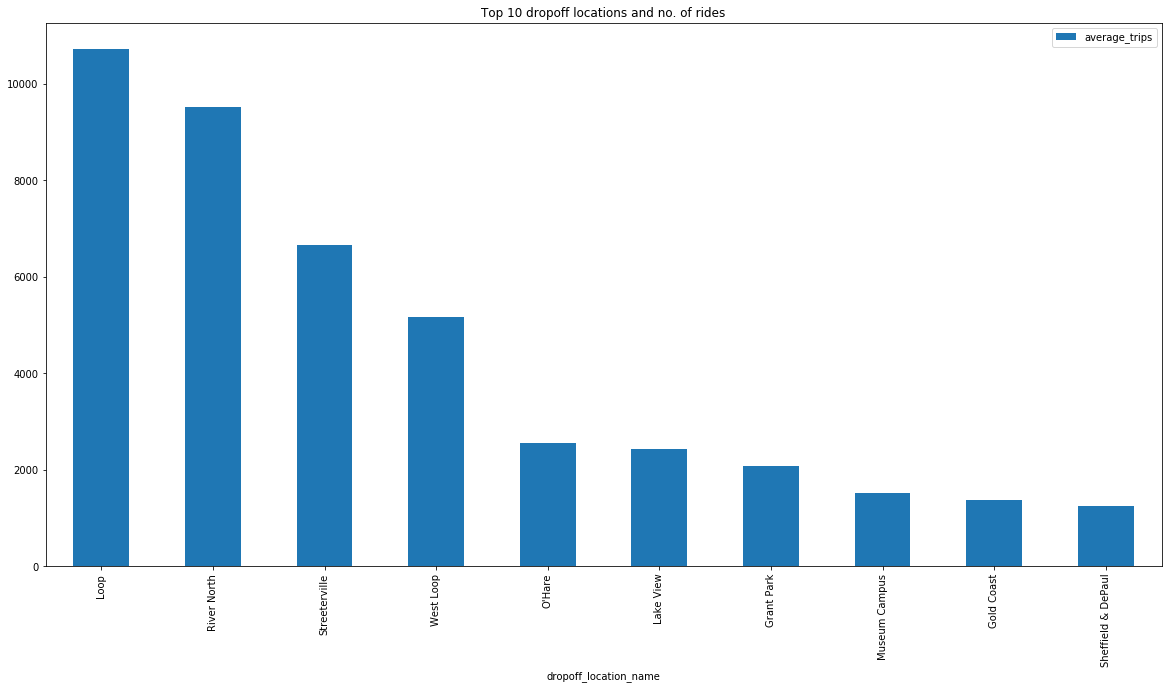

In [13]:
top_10_neighborhood.plot.bar(x='dropoff_location_name', y='average_trips', figsize=(20,10), title='Top 10 dropoff locations and no. of rides');

The Loop dropoff location has highest no. of rides which is around 11000 rides. 

#### Section 1.4: Conclusions <a class="anchor" id="section_1_4"></a>

For the analysis two datasets sql_project_1 and sql_project_2 were imported. 

The sql_project_1 dataset contains the following data columns:

1. __company_name:__ taxi company name
2. __trips_amount:__ the number of rides for each taxi company on November 15-16, 2017.

There are total 64 rows and the datatypes are correct.

The second dataset, sql_project_2 It contains the following data columns:

1. __dropoff_location_name:__ Chicago neighborhoods where rides ended
2. __average_trips:__ the average number of rides that ended in each neighborhood in November 2017.

There are total 94 rows and the datatype for average_trips will be converted to the integer. THe total no. of rides should be a integer.


When analyzing the total number of rides for each company, It has observed that some companies have bigger market share compare to the others. i.e Fresh cab has around 19000 rides and 3556-36214 RC Andrews Cab has nearly no rides.

One fact can be observed that the nice companies name has more no.of rides compare to the companies whose name start with some phone numbers etc.

For better data visualization the company names can be sorted i.e the first 20 highest rides companies can be ploted with it's name and remaining can be grouped in the 'other ' category for better representation. The companies whose rides are less than 1500 has grouped named Other. After applying agg_func=sum the no.of_rides columns wass sorted by descending order to find the highest ranked companies.


To find out the most favriote neighborhood for cabs, Loop is the top ranked neighborhood in terms of the average_trips. It has highest no. of trips. Which is around 11000.

### Chapter 2: Step 5. Testing hypotheses <a class="anchor" id="chapter2"></a>

In [14]:
try:
    sql_project_3=pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    sql_project_3=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Database_Project\project_sql_result_07.csv")
sql_project_3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


The csv file is imported and named sql_project_3. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:


start_ts: pickup date and time

weather_conditions: weather conditions at the moment the ride started

duration_seconds: ride duration in seconds

__Test the hypothesis:__

__"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."__

__Decide where to set the significance level (alpha) on your own.__

__Explain:__

how you formed the null and alternative hypotheses

what criterion you used to test the hypotheses and why

The Mann Whitney U Test Direct Method is choosed to test the distribution of two samples. The samples were made on the basis of weather_conditions as 'Good/Bad'.

The __sample_1__ represents the weather_conditions "Good"

and
The __sampe_2__ represents the weather_conditons "Bad".

__Null Hypothesis for the Test__ __(Fail to Reject H0:)__ 

Sample distributions are equal.

The assumption or null hypothesis is that there is no difference between the distributions of the data samples Good/Bad weathers. 


__An alternate hypothesis__ 

Rejection of Null hypothesis suggests that there is likely some difference between the samples of Good/Bad weathers.

__Reject H0:__ Sample distributions are not equal.

The significant level of 5% is selected.



In [15]:
sample_1= sql_project_3.query('weather_conditions=="Good"')
sample_2= sql_project_3.query('weather_conditions=="Bad"')
display(sample_1.head(),sample_2.head())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0


In [16]:
from scipy.stats import mannwhitneyu

stat, p =mannwhitneyu(sample_1['duration_seconds'],sample_2['duration_seconds'])
alpha=0.05
if p >alpha:
    print("The average duration of rides from the Loop to O'Hare International Airport remains same on rainy Saturdays.(fail to reject H0)")
else:
    print("The average duration of rides from the Loop to O'Hare International Airport does not remain same on rainy Saturdays.(reject H0)")

The average duration of rides from the Loop to O'Hare International Airport does not remain same on rainy Saturdays.(reject H0)


## Conclusion

The test concludes that the The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.